# Benchmark Bernoulli Markovian Tree model

This notebook aims at verifying the convergence and benchmarking the Bernoulli Markovian Tree Model.

## Artificial dataset

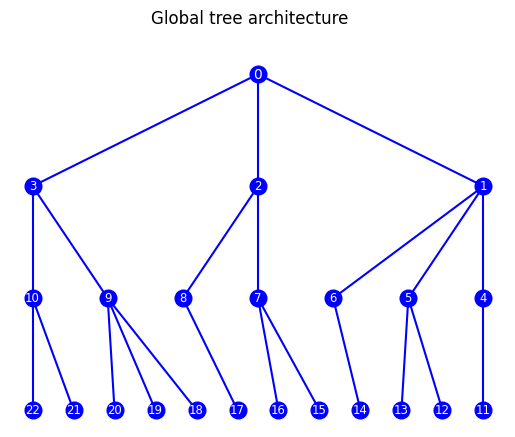

In [1]:
from src.utils import Tree
import matplotlib.pyplot as plt

# Define a global tree architecture

global_adjacency_matrix = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 0
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 1
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # node 6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], # node 7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # node 8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], # node 9
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], # node 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 14
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 15
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 16
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 17
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 19
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 20
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 21
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 22
]

global_tree = Tree(global_adjacency_matrix)
global_tree.plot(title="Global tree architecture")
plt.show()

In [2]:
from src.model import BernoulliTreePrior, DirichletAbundanceTreePosterior
import numpy as np

# Generate the dataset based on the previous architecture
dataset_size = 100

# First we define the parameters of the model, which are our objectives
activation_probabilities = {
    0:1,
    1:0.999,
    2:0.998,
    3:0.995,
    4:0.45,
    5:0.75,
    6:0.8,
    7:0.94,
    8:0.25,
    9:0.9,
    10:0.65,
    11:0.95,
    12:0.76,
    13:0.5,
    14:0.76,
    15:0.67,
    16:0.1,
    17:0.6,
    18:0.2,
    19:0.7,
    20:0.53,
    21:0.9,
    22:0.2
}

dirichlet_parameters = {}
for i, adjacency in enumerate(global_tree.adjacent_matrix):
    countChildren = np.sum(adjacency)
    if countChildren > 1:
        dirichlet_parameters[i] = np.abs(np.random.rand(countChildren))

def generate_dataset(size):

    prior = BernoulliTreePrior(global_tree, activation_probabilities)
    posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters)

    trees = []

    for i in range(dataset_size):
        sampled_tree = prior.sample_tree()
        sampled_abundance_tree = posterior.sample_abundance_tree(sampled_tree)
        trees.append(sampled_abundance_tree)

    return trees

trees = generate_dataset(dataset_size)

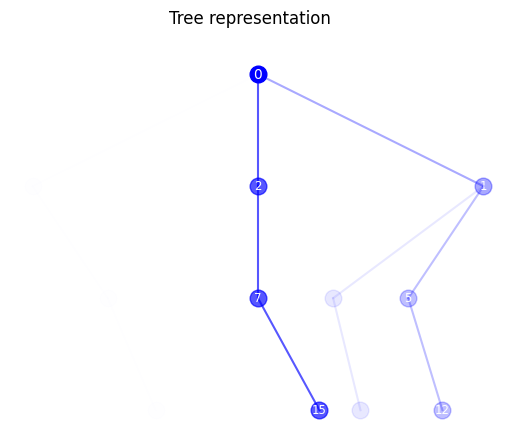

In [3]:
# plot a few trees
n_plot = 1
for i in range(n_plot):
    tree = trees[i]
    tree.plot()
plt.show()

## Learning the distributions over the artificial data

Fitting DirichletAbundanceTree - Likelihood: 3826.119105261754
Fitting DirichletAbundanceTree - Likelihood: 3859.151536867604
Fitting DirichletAbundanceTree - Likelihood: 3870.6523939192925
Fitting DirichletAbundanceTree - Likelihood: 3876.5797459086684
Fitting DirichletAbundanceTree - Likelihood: 3880.2464914824614
Fitting DirichletAbundanceTree - Likelihood: 3882.749564237365
Fitting DirichletAbundanceTree - Likelihood: 3884.577010273762
Fitting DirichletAbundanceTree - Likelihood: 3885.9842537376376
Fitting DirichletAbundanceTree - Likelihood: 3887.1174584244827
Fitting DirichletAbundanceTree - Likelihood: 3888.0651009077537
Fitting DirichletAbundanceTree - Likelihood: 3888.8829882636246
Fitting DirichletAbundanceTree - Likelihood: 3889.6075174220387
Fitting DirichletAbundanceTree - Likelihood: 3890.2631161093364
Fitting DirichletAbundanceTree - Likelihood: 3890.8665958691863
Fitting DirichletAbundanceTree - Likelihood: 3891.429785293994
Fitting DirichletAbundanceTree - Likelihood: 

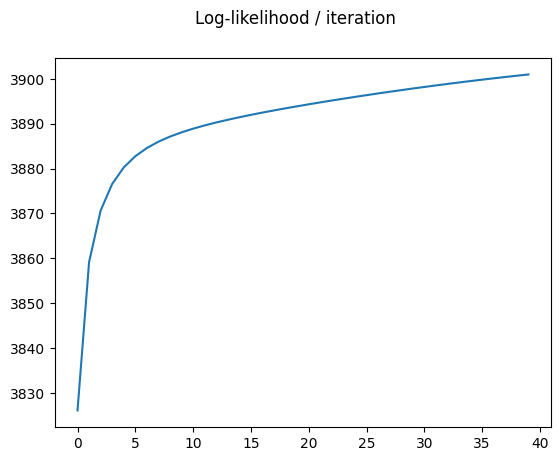

In [4]:
# Using the artificial dataset, we try to compute the p(X,T)

prior = BernoulliTreePrior(global_tree, activation_probabilities={})
posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={})

prior.fit(trees)
ll = posterior.fit(trees, n_iter=40)

fig, axs = plt.subplots()
fig.suptitle("Log-likelihood / iteration")
axs.plot(ll)

We repeat the experiments a several times to look at the general convergence profile.

* Experiment 0
Fitting DirichletAbundanceTree - Likelihood: 3842.9739715202086
Fitting DirichletAbundanceTree - Likelihood: 3878.7510783720077
Fitting DirichletAbundanceTree - Likelihood: 3891.126476002898
Fitting DirichletAbundanceTree - Likelihood: 3897.2359320597548
Fitting DirichletAbundanceTree - Likelihood: 3900.5963160558645
Fitting DirichletAbundanceTree - Likelihood: 3902.5659379128983
Fitting DirichletAbundanceTree - Likelihood: 3903.7813242344264
Fitting DirichletAbundanceTree - Likelihood: 3904.5643173692747
Fitting DirichletAbundanceTree - Likelihood: 3905.0874353939794
Fitting DirichletAbundanceTree - Likelihood: 3905.447930352043
Fitting DirichletAbundanceTree - Likelihood: 3905.7030695687295
Fitting DirichletAbundanceTree - Likelihood: 3905.8878858157004
Fitting DirichletAbundanceTree - Likelihood: 3906.024541003402
Fitting DirichletAbundanceTree - Likelihood: 3906.1274742791993
Fitting DirichletAbundanceTree - Likelihood: 3906.206338719735
Fitting DirichletAbundanceTre

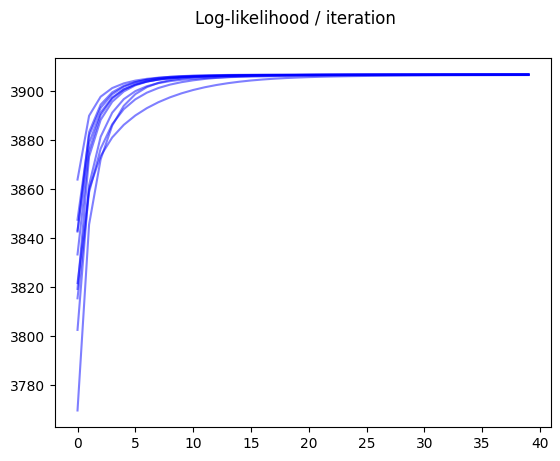

In [5]:
# Using the artificial dataset, we try to compute the p(X,T)

fig, axs = plt.subplots()
fig.suptitle("Log-likelihood / iteration")

n_repeat = 10

prior_list = []
posterior_list = []

for _ in range(n_repeat):
    print("* Experiment", _)
    prior = BernoulliTreePrior(global_tree, activation_probabilities={})
    posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={})

    prior.fit(trees)
    ll = posterior.fit(trees, n_iter=40)

    prior_list.append(prior)
    posterior_list.append(posterior)

    axs.plot(ll, color='blue', alpha=0.5)

plt.show()

Now we would like to compare the fitted distribution to the true one.

proba | node 0 : 1  -  1.0
proba | node 1 : 0.999  -  1.0
proba | node 2 : 0.998  -  1.0
proba | node 3 : 0.995  -  0.99
proba | node 4 : 0.45  -  0.39
proba | node 5 : 0.75  -  0.76
proba | node 6 : 0.8  -  0.79
proba | node 7 : 0.94  -  0.91
proba | node 8 : 0.25  -  0.27
proba | node 9 : 0.9  -  0.43434343434343436
proba | node 10 : 0.65  -  0.5959595959595959
proba | node 11 : 0.95  -  0.9743589743589743
proba | node 12 : 0.76  -  0.7368421052631579
proba | node 13 : 0.5  -  0.5526315789473685
proba | node 14 : 0.76  -  0.7721518987341772
proba | node 15 : 0.67  -  0.7142857142857143
proba | node 16 : 0.1  -  0.10989010989010989
proba | node 17 : 0.6  -  0.5925925925925926
proba | node 18 : 0.2  -  0.2558139534883721
proba | node 19 : 0.7  -  0.6976744186046512
proba | node 20 : 0.53  -  0.5348837209302325
proba | node 21 : 0.9  -  0.9322033898305084
proba | node 22 : 0.2  -  0.11864406779661017
alpha | node 0 : [0.716228   0.307926   0.34398717]  -  [0.66267384 0.28661887 0.392860

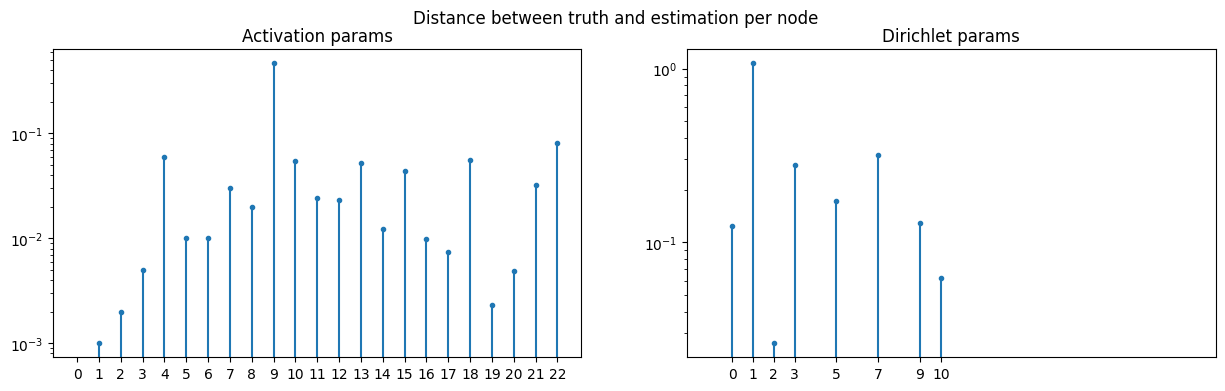

In [6]:
def compute_params_difference(prior, posterior, printValues=False):
    # We compute the distance between the activation probabilities
    activation_proba_difference = np.zeros(len(activation_probabilities.values()))
    for node_index in activation_probabilities.keys():
        activation_proba_difference[node_index] = np.abs(activation_probabilities[node_index] - prior.nodes[node_index].activationProba)
        if printValues:
            print("proba | node", node_index, ":", activation_probabilities[node_index], " - ", prior.nodes[node_index].activationProba)

    # Then we compute the distance between the alpha parameters of the dirichlet distribution
    dirichlet_params_difference = np.zeros(len(activation_probabilities.values()))
    for node_index in dirichlet_parameters.keys():
        dirichlet_params_difference[node_index] = np.linalg.norm(
            np.array(dirichlet_parameters[node_index]) - np.array(posterior.dirichlet_params[node_index]),
            ord=1
        )
        if printValues:
            print("alpha | node", node_index, ":", dirichlet_parameters[node_index], " - ", posterior.dirichlet_params[node_index])

    return activation_proba_difference, dirichlet_params_difference

activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior, printValues=True)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].plot(activation_proba_difference, marker=".", linestyle="")
axs[0].set_xticks(np.arange(0, len(activation_proba_difference)))
for node_index, diff in enumerate(activation_proba_difference):
    axs[0].vlines(x = node_index, ymin=0, ymax = diff, color="C0")
axs[1].plot(dirichlet_params_difference, marker=".", linestyle="")
dirichlet_xaxis = []
for node in global_tree.nodes:
    if node.countChildren() > 1:
        dirichlet_xaxis.append((node.index))
axs[1].set_xticks(dirichlet_xaxis)
for node_index, diff in enumerate(dirichlet_params_difference):
    axs[1].vlines(x = node_index, ymin=0, ymax = diff, color="C0")
axs[0].set_title("Activation params")
axs[1].set_title("Dirichlet params")
axs[1].plot([-1], [1])
axs[1].set_yscale("log")
axs[0].set_yscale("log")
fig.suptitle("Distance between truth and estimation per node")
plt.show()

We also make these converence error profiles for several models

proba | node 0 : 1  -  1.0
proba | node 1 : 0.999  -  1.0
proba | node 2 : 0.998  -  1.0
proba | node 3 : 0.995  -  0.99
proba | node 4 : 0.45  -  0.43
proba | node 5 : 0.75  -  0.81
proba | node 6 : 0.8  -  0.81
proba | node 7 : 0.94  -  0.97
proba | node 8 : 0.25  -  0.31
proba | node 9 : 0.9  -  0.8484848484848485
proba | node 10 : 0.65  -  0.6161616161616161
proba | node 11 : 0.95  -  0.9302325581395349
proba | node 12 : 0.76  -  0.7160493827160493
proba | node 13 : 0.5  -  0.48148148148148145
proba | node 14 : 0.76  -  0.691358024691358
proba | node 15 : 0.67  -  0.7628865979381443
proba | node 16 : 0.1  -  0.09278350515463918
proba | node 17 : 0.6  -  0.7096774193548387
proba | node 18 : 0.2  -  0.20238095238095238
proba | node 19 : 0.7  -  0.7261904761904762
proba | node 20 : 0.53  -  0.5357142857142857
proba | node 21 : 0.9  -  0.9016393442622951
proba | node 22 : 0.2  -  0.14754098360655737
alpha | node 0 : [0.54965395 0.52332172 0.77370638]  -  [0.53315667 0.56238497 0.756086

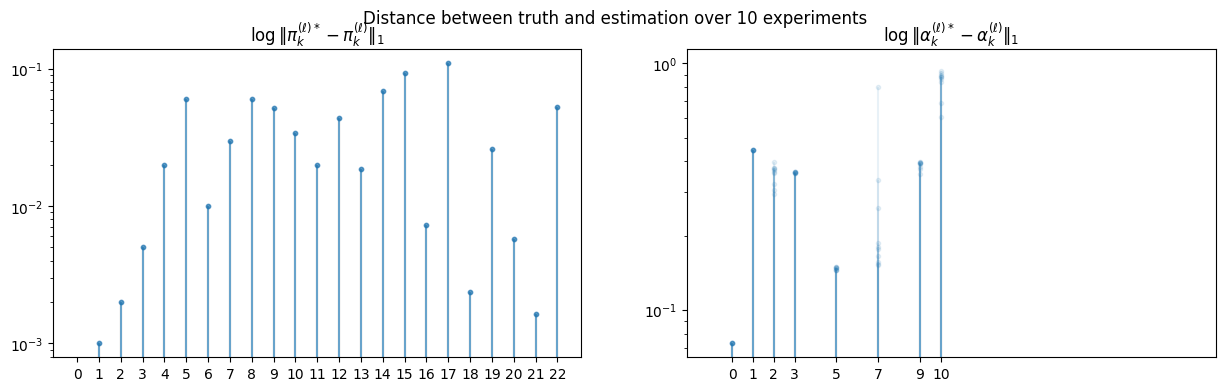

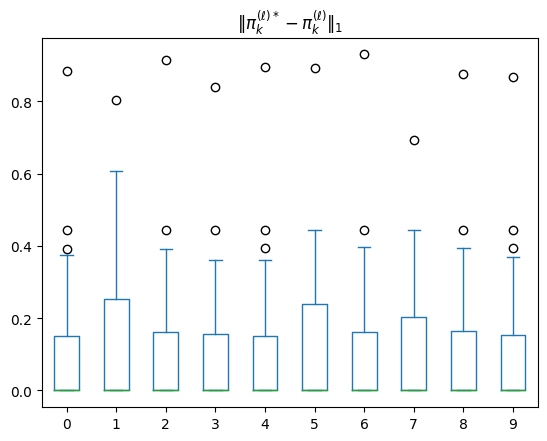

In [64]:
import pandas as pd

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
alpha = 0.1

df_dirichlet_params_difference = {}

for i in range(len(prior_list)):
    prior = prior_list[i]
    posterior = posterior_list[i]
    activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior, printValues=True)
    df_dirichlet_params_difference[i] = dirichlet_params_difference
    axs[0].plot(activation_proba_difference, marker=".", linestyle="", color='C0', alpha=alpha)
    axs[0].set_xticks(np.arange(0, len(activation_proba_difference)))
    for node_index, diff in enumerate(activation_proba_difference):
        axs[0].vlines(x = node_index, ymin=0, ymax = diff, color="C0", alpha=alpha)
    axs[1].plot(dirichlet_params_difference, marker=".", linestyle="", color="C0", alpha=alpha)
    dirichlet_xaxis = []
    for node in global_tree.nodes:
        if node.countChildren() > 1:
            dirichlet_xaxis.append((node.index))
    axs[1].set_xticks(dirichlet_xaxis)
    for node_index, diff in enumerate(dirichlet_params_difference):
        axs[1].vlines(x = node_index, ymin=0, ymax = diff, color="C0", alpha=alpha)
    axs[0].set_title("$\log \Vert \pi_k^{(\ell)*} - \pi_k^{(\ell)} \Vert_1$")
    axs[1].set_title("$\log \Vert \\alpha_k^{(\ell)*} - \\alpha_k^{(\ell)} \Vert_1$")
    axs[1].plot([-1], [1])
    axs[1].set_yscale("log")
    axs[0].set_yscale("log")
fig.suptitle(f"Distance between truth and estimation over {len(prior_list)} experiments")

df_dirichlet_params_difference = pd.DataFrame(df_dirichlet_params_difference)
df_dirichlet_params_difference.plot(kind='box', title='$\Vert \pi_k^{(\ell)*} - \pi_k^{(\ell)} \Vert_1$')

plt.show()

### Convergence per iteration

We can then plot the evolution of the distance per iteration

Fitting DirichletAbundanceTree - Likelihood: 34.025740102335675
Fitting DirichletAbundanceTree - Likelihood: 33.64218620548434
Fitting DirichletAbundanceTree - Likelihood: 33.365890978045925
Fitting DirichletAbundanceTree - Likelihood: 33.49603417125417
Fitting DirichletAbundanceTree - Likelihood: 33.51496091121738
Fitting DirichletAbundanceTree - Likelihood: 33.93133330003955
Fitting DirichletAbundanceTree - Likelihood: 33.445416854791766
Fitting DirichletAbundanceTree - Likelihood: 34.06281857058351
Fitting DirichletAbundanceTree - Likelihood: 33.2172160549469
Fitting DirichletAbundanceTree - Likelihood: 34.08205201344134
Fitting DirichletAbundanceTree - Likelihood: 34.134003416133034
Fitting DirichletAbundanceTree - Likelihood: 33.97986736331376
Fitting DirichletAbundanceTree - Likelihood: 33.74185280714493
Fitting DirichletAbundanceTree - Likelihood: 33.838003680095674
Fitting DirichletAbundanceTree - Likelihood: 33.93922370382637
Fitting DirichletAbundanceTree - Likelihood: 34.168

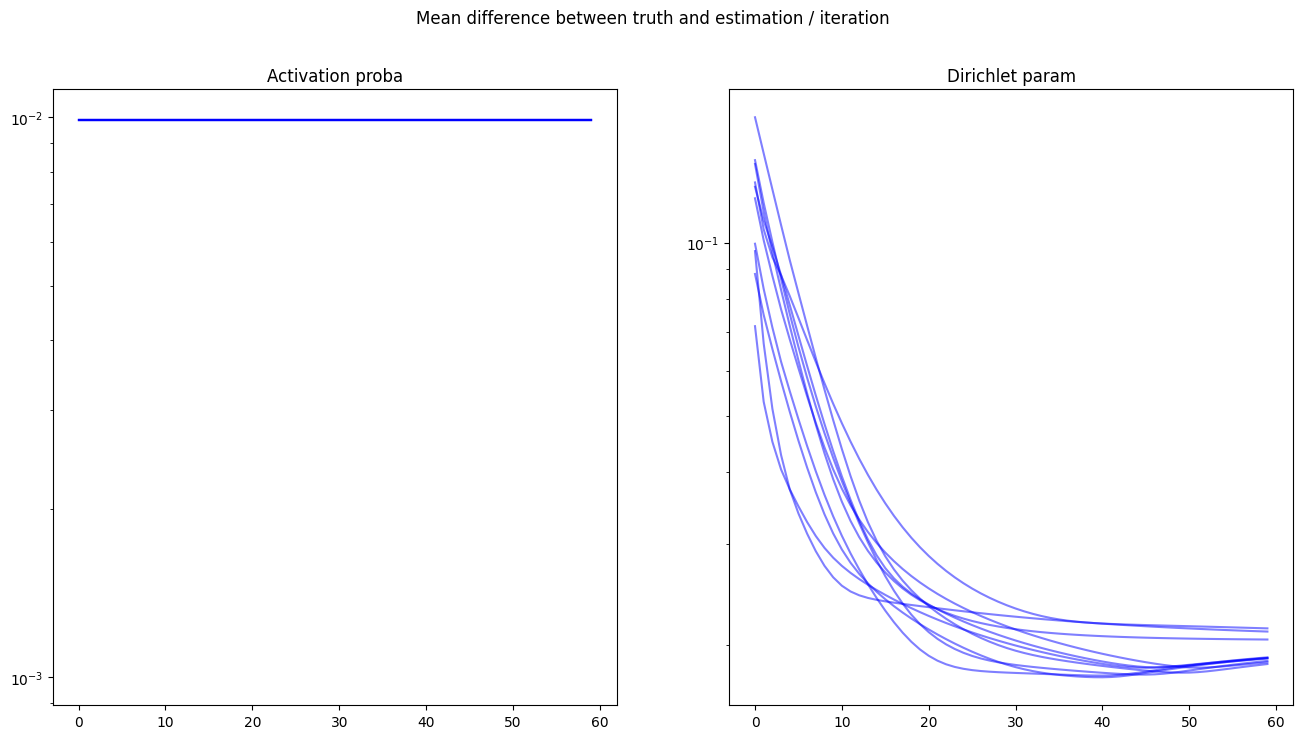

In [13]:
max_iter = 60

prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities={})
posterior_list = [DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={}) for _ in range(n_repeat)]

prior.fit(trees)

activation_proba_mean_difference = np.zeros((n_repeat, max_iter))
dirichlet_params_mean_difference = np.zeros((n_repeat, max_iter))

for i in range(max_iter):

    for k, posterior in enumerate(posterior_list):
        posterior.fit(trees, n_iter=1)
        activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior)

        activation_proba_mean_difference[k][i] = activation_proba_difference.mean()
        dirichlet_params_mean_difference[k][i] = dirichlet_params_difference.mean()

fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Mean difference between truth and estimation / iteration")
axs[0].set_title("Activation proba")
axs[1].set_title("Dirichlet param")
for k in range(n_repeat):
    axs[0].plot(activation_proba_mean_difference[k], color='blue', alpha=0.5)
    axs[1].plot(dirichlet_params_mean_difference[k], color='blue', alpha=0.5)
axs[0].set_yscale('log')
axs[1].set_yscale('log')

### Convergence per sample

In [17]:
import copy

max_size = 1000
step = 25

trees = generate_dataset(max_size)

prior_list_seed = [BernoulliTreePrior(global_tree, activation_probabilities=activation_probabilities) for _ in range(n_repeat)]
posterior_list_seed = [DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={}) for _ in range(n_repeat)]

df_activation_proba = {}
df_dirichlet_params = {}

activation_proba_mean_difference = np.zeros((n_repeat, max_size//step))
dirichlet_params_mean_difference = np.zeros((n_repeat, max_size//step))

i = 0
size = step
tested_sizes = []
while size <= max_size:
    print("Experiment: ", size)
    prior_list = [BernoulliTreePrior(global_tree, activation_probabilities=prior.getActivationProbabilities()) for prior in prior_list]
    posterior_list = [DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters=posterior.dirichlet_params) for posterior in posterior_list]

    list_activation_proba_diff = []
    list_dirichlet_params_diff = []

    for k in range(n_repeat):
        prior = prior_list[k]
        posterior = posterior_list[k]

        prior.fit(trees[0:size])
        posterior.fit(trees[0:size], n_iter=40)

        activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior)

        list_activation_proba_diff.append(activation_proba_difference)
        list_dirichlet_params_diff.append(dirichlet_params_difference)

        activation_proba_mean_difference[k][i] = activation_proba_difference.mean()
        dirichlet_params_mean_difference[k][i] = dirichlet_params_difference.mean()

    df_activation_proba[size] = list_activation_proba_diff
    df_dirichlet_params[size] = list_dirichlet_params_diff

    tested_sizes.append(size)
    size += step
    i += 1

Experiment:  25
Fitting DirichletAbundanceTree - Likelihood: 789.2271966355262
Fitting DirichletAbundanceTree - Likelihood: 791.8804830752946
Fitting DirichletAbundanceTree - Likelihood: 792.8864035077457
Fitting DirichletAbundanceTree - Likelihood: 793.3948706325577
Fitting DirichletAbundanceTree - Likelihood: 793.7124502537974
Fitting DirichletAbundanceTree - Likelihood: 793.9376761918265
Fitting DirichletAbundanceTree - Likelihood: 794.1067658425394
Fitting DirichletAbundanceTree - Likelihood: 794.2369932880098
Fitting DirichletAbundanceTree - Likelihood: 794.3390313221823
Fitting DirichletAbundanceTree - Likelihood: 794.4204444632495
Fitting DirichletAbundanceTree - Likelihood: 794.4868043695907
Fitting DirichletAbundanceTree - Likelihood: 794.5421946196569
Fitting DirichletAbundanceTree - Likelihood: 794.5895574460122
Fitting DirichletAbundanceTree - Likelihood: 794.630979312773
Fitting DirichletAbundanceTree - Likelihood: 794.6679259511867
Fitting DirichletAbundanceTree - Likelih

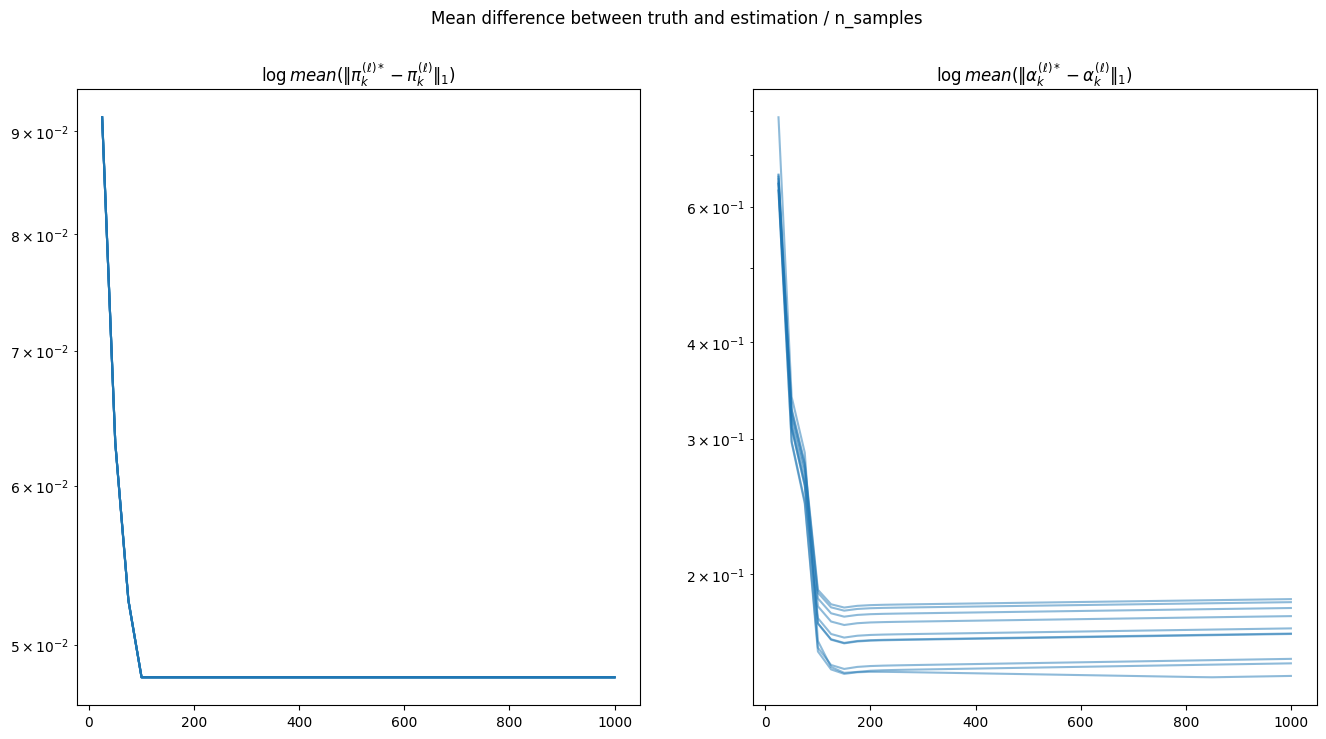

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Mean difference between truth and estimation / n_samples")
axs[0].set_title("$\log mean(\Vert \pi_k^{(\ell)*} - \pi_k^{(\ell)} \Vert_1)$")
axs[1].set_title("$\log mean(\Vert \\alpha_k^{(\ell)*} - \\alpha_k^{(\ell)} \Vert_1)$")
for k in range(n_repeat):
    axs[0].plot(tested_sizes, activation_proba_mean_difference[k], color='C0', alpha=0.5)
    axs[1].plot(tested_sizes, dirichlet_params_mean_difference[k], color='C0', alpha=0.5)
axs[0].set_yscale('log')
axs[1].set_yscale('log')

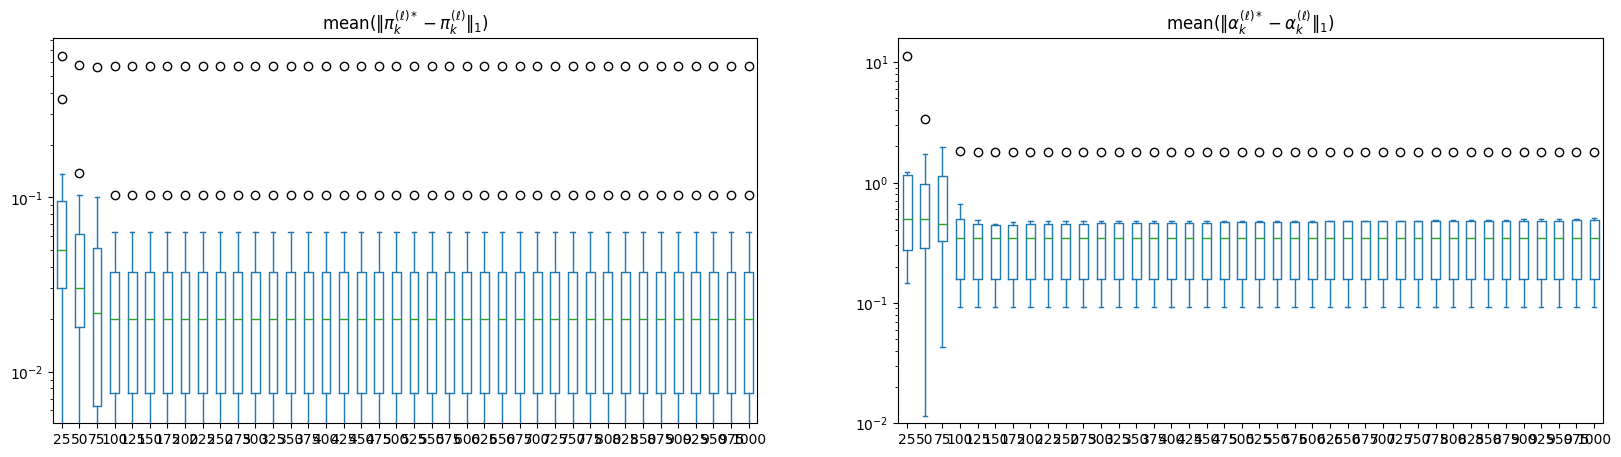

In [96]:
import pandas as pd

fig, axs = plt.subplots(1, 2, figsize=(20,5))

df_activation_proba = pd.DataFrame(df_activation_proba)
df_activation_proba_mean = df_activation_proba.apply(lambda x: x.mean())
df_activation_proba_mean.plot(kind='box', title='mean($\Vert \pi_k^{(\ell)*} - \pi_k^{(\ell)} \Vert_1$)', logy=True, ax=axs[0])


df_dirichlet_params = pd.DataFrame(df_dirichlet_params)
non_dirichlets = []
for node in global_tree.nodes:
    if node.countChildren() <= 1:
        non_dirichlets.append(node.index)
df_dirichlet_params_mean = df_dirichlet_params.apply(lambda x: x.mean())
df_dirichlet_params_mean.drop(index=non_dirichlets, inplace=True)
df_dirichlet_params_mean.plot(kind='box', title='mean($\Vert \\alpha_k^{(\ell)*} - \\alpha_k^{(\ell)} \Vert_1$)', logy=True, ax=axs[1], ylim=10e-3)

plt.show()